# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="attachment:ai_eval_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 90 баллов

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

#### Тренировочные задачи на библиотеки

Если вы неуверенно себя чувствуете в библиотеках numpy, pandas, matplotlib, seaborn, рекомендуем сначала
* посмотреть материалы по библиотекам на нашем сайте
* прорешать упражнения на библиотеки на странице курса
* прорешать <a href="https://contest.yandex.ru/contest/75090/enter/">два упражнения на numpy</a> в системе Яндекс.Контест.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

random_state = 42

In [ ]:
digits = datasets.load_digits()
n_samples = len(digits["images"])
X, y = digits["images"].reshape(n_samples, -1), digits["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

In [ ]:
k_arr = []
accuracy_train = []
accuracy_test = []

for k in range(1, 21):
  model = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  train_score = accuracy_score(y_train, y_train_pred)
  test_score = accuracy_score(y_test, y_test_pred)
  k_arr.append(k)
  accuracy_train.append(train_score)
  accuracy_test.append(test_score)

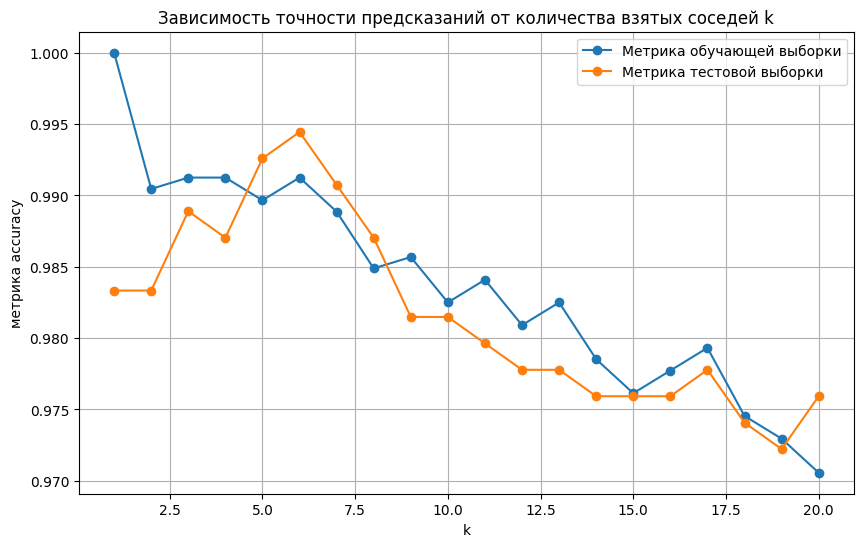

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(k_arr, accuracy_train, marker='o', label='Метрика обучающей выборки')
plt.plot(k_arr, accuracy_test, marker='o', label='Метрика тестовой выборки')

plt.xlabel('k')
plt.ylabel('метрика accuracy')
plt.title('Зависимость точности предсказаний от количества взятых соседей k')

plt.grid(True)
plt.legend()
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:** Так как KNN смотрит на соседей точки на графике, а самой близкой является сама точка, то при k=1 для тренировочных данных просто берётся её же значение (число в нашем случае). Поэтому y_train_pred просто равен y_train, а значит метрика 1.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

In [ ]:
k_arr_L1 = []
accuracy_train_L1 = []
accuracy_test_L1 = []

for k in range(1, 21):
  model = KNeighborsClassifier(n_neighbors=k, algorithm="brute", metric="manhattan")
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  train_score = accuracy_score(y_train, y_train_pred)
  test_score = accuracy_score(y_test, y_test_pred)
  k_arr_L1.append(k)
  accuracy_train_L1.append(train_score)
  accuracy_test_L1.append(test_score)

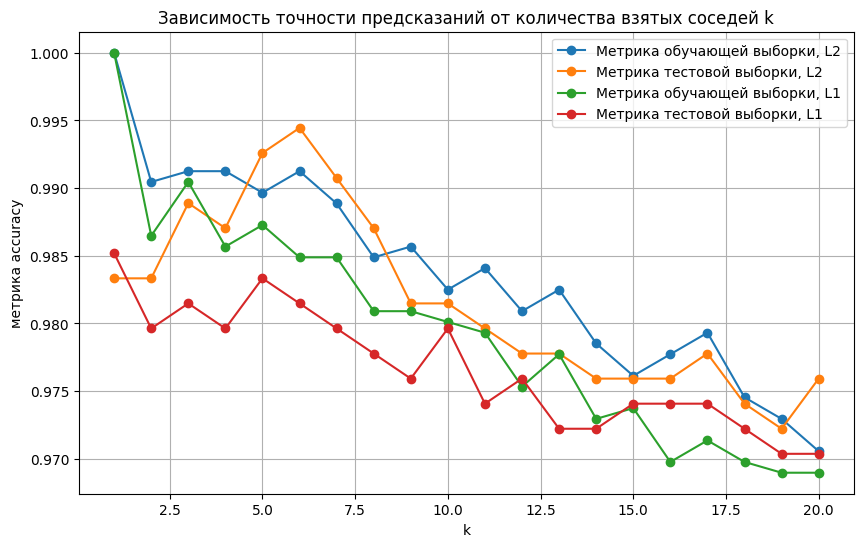

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(k_arr, accuracy_train, marker='o', label='Метрика обучающей выборки, L2')
plt.plot(k_arr, accuracy_test, marker='o', label='Метрика тестовой выборки, L2')

plt.plot(k_arr, accuracy_train_L1, marker='o', label='Метрика обучающей выборки, L1')
plt.plot(k_arr, accuracy_test_L1, marker='o', label='Метрика тестовой выборки, L1')

plt.xlabel('k')
plt.ylabel('метрика accuracy')
plt.title('Зависимость точности предсказаний от количества взятых соседей k')

plt.grid(True)
plt.legend()
plt.show()

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:** характер кривых остался точно такой же, то есть метрики падают с увеличением количества соседей. В среднем результаты с манхеттенским расстоянием хуже, так как оно менее точно работает с близкими данными, но хорошо работает с выбросами (видимо, в изначальных данных выбросов немного)

**Выводы:** для обучения модели на распознавание рукописного текста лучше работает евклидово расстояние и малые значения соседей (в данном исследовании максимум при k = 6), так как именно этими параметрами обеспечивается баланс между переобучением и недообучением.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [3]:
import pandas as pd

titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(titanic)

891

Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [11]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [12]:
combo = pd.concat([X, y], axis=1)
combo.dropna(inplace=True)
X, y = combo[features_columns], combo[target_column]

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

1. Зависимость выживаемости от возраста пассажира:

<ipython-input-14-b77b6854242a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeGroup')['Survived'].agg(['mean', 'sum', 'count'])


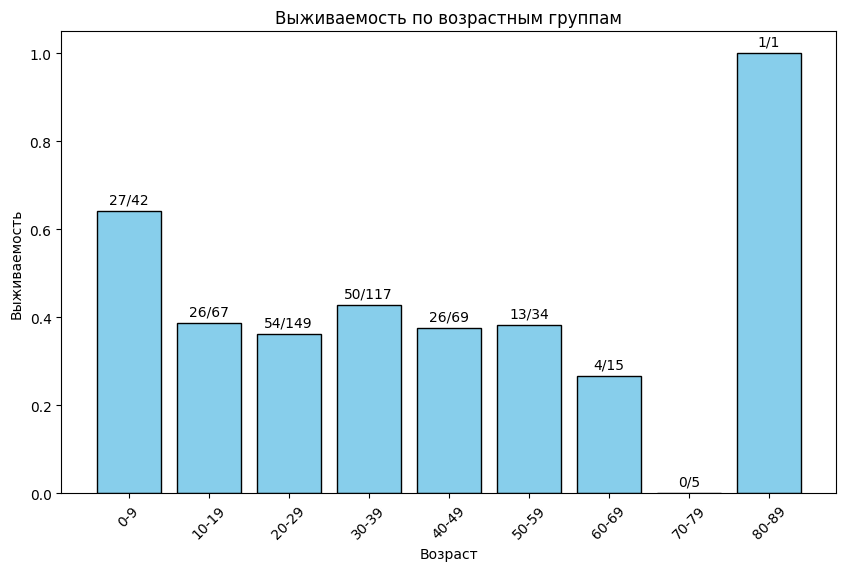

In [14]:
df = pd.concat([X_train, y_train], axis=1)

bins = range(0, 91, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_survival = df.groupby('AgeGroup')['Survived'].agg(['mean', 'sum', 'count'])

plt.figure(figsize=(10, 6))
plt.bar(age_survival.index, age_survival['mean'], color='skyblue', edgecolor='black')
plt.title('Выживаемость по возрастным группам')
plt.xlabel('Возраст')
plt.ylabel('Выживаемость')
plt.xticks(rotation=45)

for i in range(len(age_survival)):
    plt.text(i, age_survival['mean'].iloc[i] + 0.01, f"{age_survival['sum'].iloc[i]}/{age_survival['count'].iloc[i]}", ha='center', va='bottom')

plt.show()

Для возрастных групп 70-89 слишком маленькая выборка (суммарно 6 человек), поэтому эти результаты являются выбросами. По графику можно заметить, что максимальная выживаемость замечена среди лиц до 40 лет, старшее поколение же имеет более высокую смертность.

2. Зависимость от класса билета и его цены

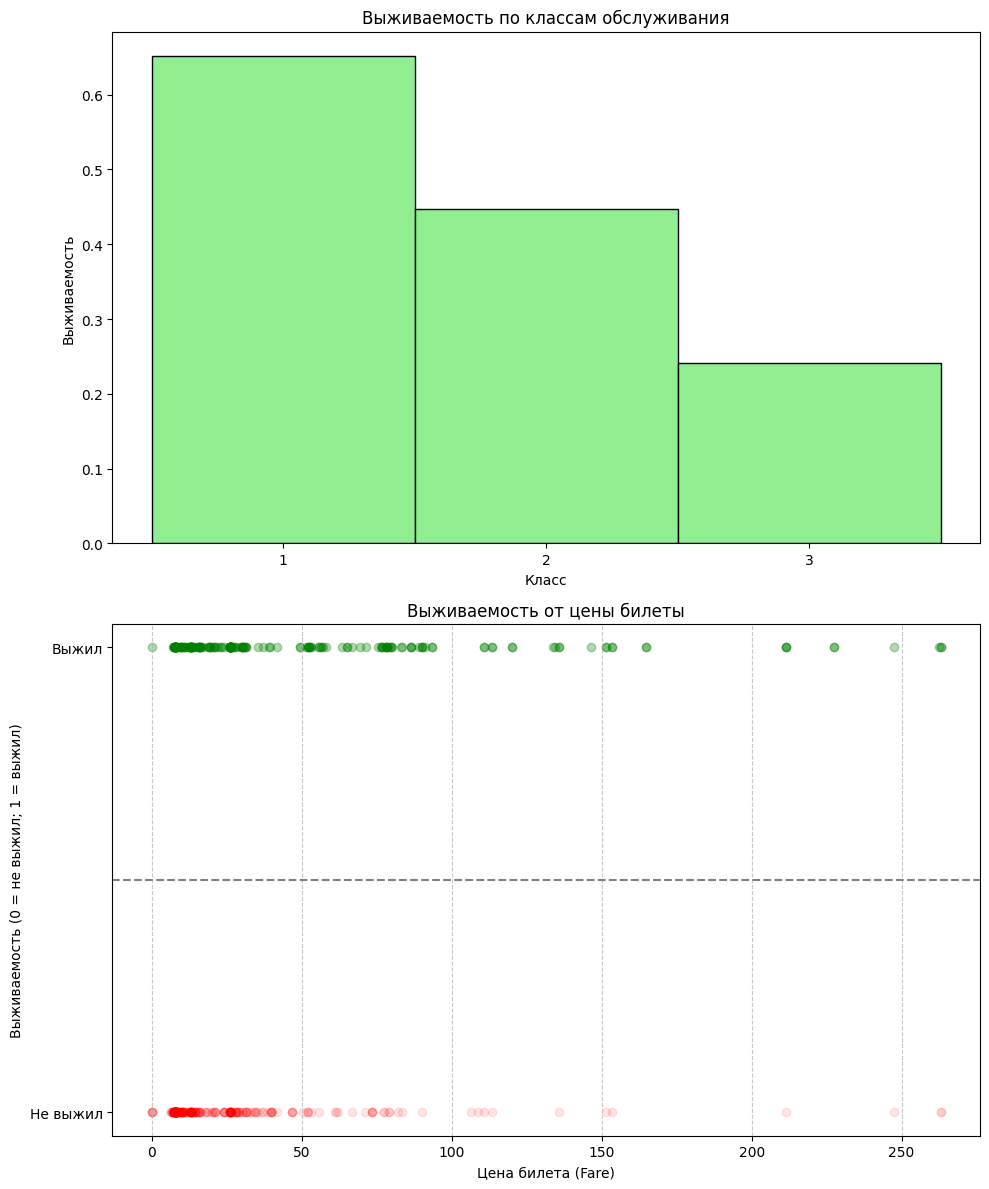

In [26]:
df = pd.concat([X_train, y_train], axis=1)
class_survival = df.groupby('Pclass')['Survived'].agg(['mean'])

fig, axs = plt.subplots(2, figsize=(10, 12))

axs[0].hist(class_survival.index, weights=class_survival['mean'], bins=[0.5, 1.5, 2.5, 3.5], color='lightgreen', edgecolor='black')
axs[0].set_title('Выживаемость по классам обслуживания')
axs[0].set_xlabel('Класс')
axs[0].set_ylabel('Выживаемость')
axs[0].set_xticks([1, 2, 3])

axs[1].scatter(df[(df['Survived'] == 1) & (df['Fare'] <= 300)]['Fare'], df[(df['Survived'] == 1) & (df['Fare'] <= 300)]['Survived'], color='green', alpha=0.3)
axs[1].scatter(df[df['Survived'] == 0]['Fare'], df[df['Survived'] == 0]['Survived'], color='red', alpha=0.1)

# Настройка второго графика
axs[1].set_title('Выживаемость от цены билеты')
axs[1].set_xlabel('Цена билета (Fare)')
axs[1].set_ylabel('Выживаемость (0 = не выжил; 1 = выжил)')
axs[1].set_yticks([0, 1])
axs[1].set_yticklabels(['Не выжил', 'Выжил'])
axs[1].axhline(0.5, color='gray', linestyle='--') # Линия для разделения классов
axs[1].grid(axis='x', linestyle='--', alpha=0.7)

# Отображение графиков
plt.tight_layout() # Автоматическая настройка расстояний между подграфиками
plt.show()

Видно, что больше всего людей выжило во 2 и 1 классе (при этом в 1 классе выжило больше всего людей), третий же оказался самым смертельным. При этом люди, которые заплатили за билет больше 50 долларов, выживали чаще, чем те, кто решил сэкономить.

3. Зависимость от количества родственников

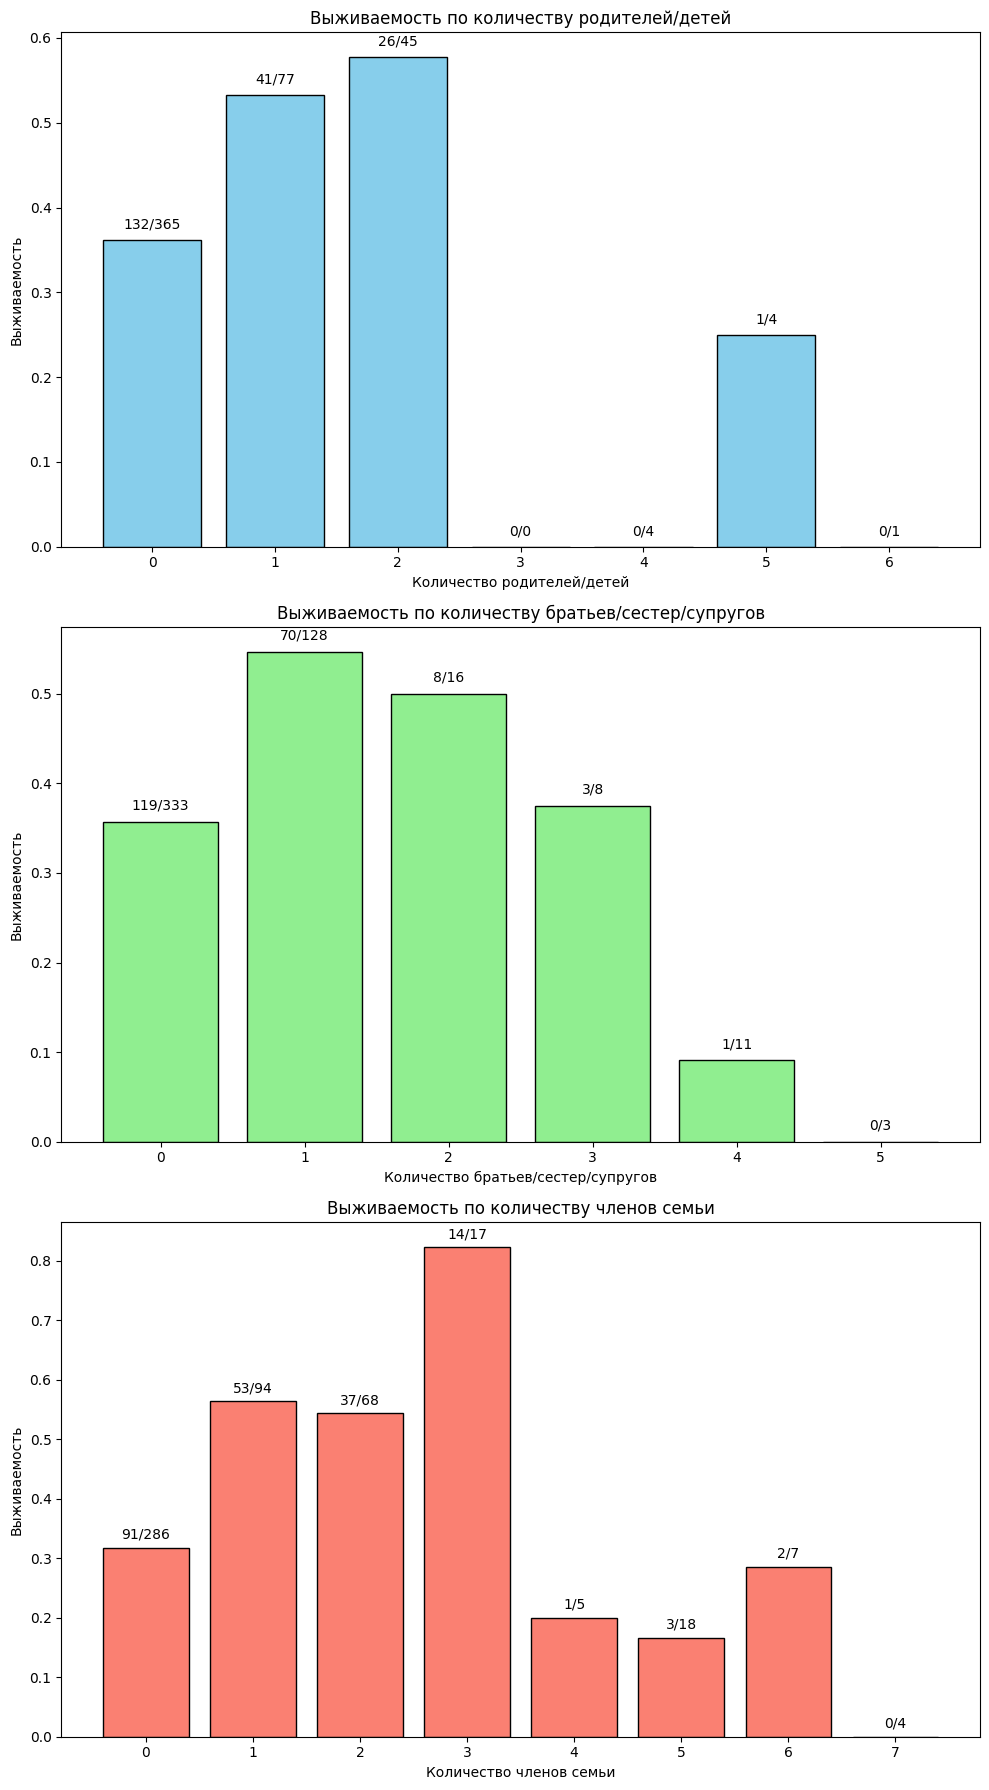

In [16]:
df = pd.concat([X_train, y_train], axis=1)

df['FamilyMembers'] = df['Parch'] + df['SibSp']

parch_survival = df.groupby('Parch')['Survived'].agg(['mean', 'sum', 'count'])
parch_survival.loc[3] = {'mean': 0, 'sum': 0, 'count': 0}
parch_survival = parch_survival.sort_index()

sib_survival = df.groupby('SibSp')['Survived'].agg(['mean', 'sum', 'count'])
family_survival = df.groupby('FamilyMembers')['Survived'].agg(['mean', 'sum', 'count'])

fig, axs = plt.subplots(3, figsize=(10, 18))

# График для parch_survival
axs[0].bar(parch_survival.index, parch_survival['mean'], color='skyblue', edgecolor='black')
axs[0].set_title('Выживаемость по количеству родителей/детей')
axs[0].set_xlabel('Количество родителей/детей')
axs[0].set_ylabel('Выживаемость')
axs[0].set_xticks(parch_survival.index)

for i in range(len(parch_survival.index)):
    axs[0].text(i, parch_survival['mean'].iloc[i] + 0.01,
                f"{parch_survival['sum'].iloc[i]}/{parch_survival['count'].iloc[i]}",
                ha='center', va='bottom')

# График для sib_survival
axs[1].bar(sib_survival.index, sib_survival['mean'], color='lightgreen', edgecolor='black')
axs[1].set_title('Выживаемость по количеству братьев/сестер/супругов')
axs[1].set_xlabel('Количество братьев/сестер/супругов')
axs[1].set_ylabel('Выживаемость')
axs[1].set_xticks(sib_survival.index)

for i in range(len(sib_survival.index)):
    axs[1].text(i, sib_survival['mean'].iloc[i] + 0.01,
                f"{sib_survival['sum'].iloc[i]}/{sib_survival['count'].iloc[i]}",
                ha='center', va='bottom')

# График для family_survival
axs[2].bar(family_survival.index, family_survival['mean'], color='salmon', edgecolor='black')
axs[2].set_title('Выживаемость по количеству членов семьи')
axs[2].set_xlabel('Количество членов семьи')
axs[2].set_ylabel('Выживаемость')
axs[2].set_xticks(family_survival.index)

for i in range(len(family_survival.index)):
    axs[2].text(i, family_survival['mean'].iloc[i] + 0.01,
                f"{family_survival['sum'].iloc[i]}/{family_survival['count'].iloc[i]}",
                ha='center', va='bottom')

# Отображение графиков
plt.tight_layout()
plt.show()

Люди с 2 родителями/детьми или с 1-2 сиблингами/супругом выживали чаще, чем одинокие пассажиры. В целом количество близких людей на борту положительно влияло на выживаемость: больше половины людей, у которых было 1-3 члена семьи, выжили. При этом большие семьи в основном имеют негативную тенденцию к выживаемости, но данных по ним немного, поэтому их нельзя считать достаточно релевантными.

4. Зависимость от пола пасажира:

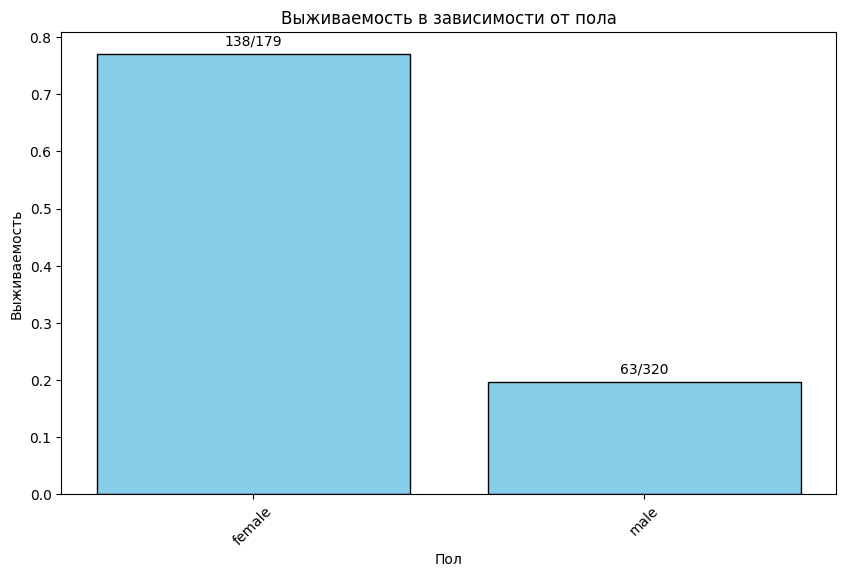

In [17]:
df = pd.concat([X_train, y_train], axis=1)

sex_survival = df.groupby('Sex')['Survived'].agg(['mean', 'sum', 'count'])

plt.figure(figsize=(10, 6))
plt.bar(sex_survival.index, sex_survival['mean'], color='skyblue', edgecolor='black')
plt.title('Выживаемость в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Выживаемость')
plt.xticks(rotation=45)


for i in range(len(sex_survival)):
    plt.text(i, sex_survival['mean'].iloc[i] + 0.01, f"{sex_survival['sum'].iloc[i]}/{sex_survival['count'].iloc[i]}", ha='center', va='bottom')

plt.show()

Заметно, что мужчины выживали гораздо реже, чем женщины (почти каждая женщина на корабле выжила, а у мужчин выжило около 20%)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

*Примечание от студента:* я делала это задание до того, как сказали, что надо учитывать данные, которые изначально удалялись из-за dropna, поэтому выводы сделаны из графиков для 180 значений, а не 800. Не бейте, пожалуйста

**Дерево 1:**

В этом дереве решений основное внимание уделяется графику зависимости выживаемости от класса обслуживания. Анализ данных показывает, что пассажиры, путешествующие в 1-м и 2-м классах, выживали значительно чаще, чем пассажиры из 3-го класса. На основе этого наблюдения можно выделить следующие ключевые моменты:

- Первый узел: Класс обслуживания

Если класс обслуживания пассажира — 3-й, то согласно графику выживаемости, вероятность его выживания крайне низкая. В этом случае дерево сразу приходит к выводу, что пассажир, скорее всего, не выжил.

Если же класс обслуживания — 1-й или 2-й, то решение становится более сложным, и необходимо учитывать следующий фактор — цену билета.

- Второй узел: Цена билета

График зависимости выживаемости от цены билета показывает, что люди с билетами дороже 50 долларов выживали чаще. Поэтому для пассажиров из 1-го и 2-го классов ключевым становится условие стоимости билета.

Если цена билета превышает 50 долларов — дерево классифицирует такого пассажира как выжившего.

Если же билет стоил 50 долларов или меньше, то вероятность выживания снижается, и дерево приходит к выводу, что такой пассажир погиб.

**Дерево 2:**

Во втором дереве решений акцент делается на графике зависимости выживаемости от возраста. Анализ показывает, что молодые люди (моложе 40 лет) имели значительно больше шансов выжить по сравнению с людьми старшего возраста. Логика дерева выглядит следующим образом:

- Первый (и единственный) узел: Возраст

Если возраст пассажира составляет менее 40 лет, согласно графику, вероятность его выживания выше. В этом случае дерево классифицирует такого человека как выжившего.

Если же возраст пассажира составляет 40 лет или больше, то вероятность выживания оказывается заметно ниже, и дерево приходит к выводу, что такой человек погиб.

Это дерево имеет всего один уровень и принимает решение исключительно на основе возраста.

Реализуйте полученные деревья по шаблону

In [ ]:
def tree(features: pd.DataFrame) -> pd.Series:
  predictions = []
  for index, row in features.iterrows():
    if row['Pclass'] == 3:
      predictions.append(0)
    elif row['Age'] >= 40:
      predictions.append(0)
    elif row['Fare'] < 50:
      predictions.append(0)
    else:
      predictions.append(1)

  predicted = pd.Series(predictions, index=features.index)
  return predicted

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [ ]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:
    correct = (target == predicted).sum()
    total = len(target)
    return correct / total

In [ ]:
print(accuracy(y_test, tree(X_test)))
random = pd.Series(np.random.choice([0, 1], size=len(y_test)), index=y_test.index)
print(accuracy(y_test, random))

0.5636363636363636
0.43636363636363634


Мы видим, что точность предсказания получилась чуть больше 50%. При этом произвольный выбор 0 или 1 дал бы нам точность около 50%. Получается, данная модель нерепрезентативна.

P.s. хотя при рандомном выборе значений получается всё же меньше. Хотя это не показатель, так как выборка y_test имеет всего около 50 значений

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:** признаки SibSp и Parch могут быть взаимосвязанны, так как например семейное путешествие (2 родителя, 2 ребенка) порождает сразу несколько связей элементов таблицы. Получается, что эти 2 признака - не характеристика отдельного человека, а группы разрозненных данных. К тому же, если вдаваться в суть таблицы, связь ребенок-родитель влияет на выживаемость так, что скорее всего либо оба человека умерли, либо оба выжили. Получается что выживаемость ребенка зависит не только от количества родителей или сиблингов у него, но и от того, выжили ли они, то есть нарушает причинно-следственную связь изолированного от других параметра и выживаемости. Те же самые рассуждения можно привести и для других родственных связей.

Для признака Pclass такой проблемы нет, так как класс обслуживания это характеристика отдельного пассажира.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




In [27]:
from sklearn.preprocessing import LabelEncoder

features = ["Pclass", "Age", "Sex", "Fare"]

label_encoder = LabelEncoder()
X_train['Sex'] = label_encoder.fit_transform(X_train['Sex'])
X_test['Sex'] = label_encoder.fit_transform(X_test['Sex'])

model = KNeighborsClassifier(n_neighbors=15, algorithm="brute")
model.fit(X_train[features], y_train)
y_train_pred = model.predict(X_train[features])
y_test_pred = model.predict(X_test[features])
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

train_score, test_score

(0.7454909819639278, 0.7023255813953488)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [19]:
for feature in features:
  print(f"{feature}: min = {X[feature].min()}, max = {X[feature].max()}")

Pclass: min = 1, max = 3
Age: min = 0.42, max = 80.0
Sex: min = female, max = male
Fare: min = 0.0, max = 512.3292


Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**  данные имеют очень разный масштаб по разным осям, а значит вносят существенно разный вклад в расстояния в 4-мерном пространстве. Для kNN нужны отнормированные значения (то есть максимум и минимум по каждому параметру должны иметь примерно одинаковые числовые значения).


Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:** Если учитывать выбросы в данных, то минимальное и максимальное значение признака будет расположено сильно далеко от большинства точек (например, большинство цен лежит в диапазоне от 0 до 100, но есть точка 500), а значит минимаксная нормализация сожмёт большинство данных в очень узкий диапазон и они могут потерять точность.
Вторая проблема, если тестовая выборка не известна заранее, что минимум и максимум определяются только с учетом тренировочной, а значит тестовая может выйти за диапазон, посчитанный ранее.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[features])
X_train_norm = pd.DataFrame(scaler.transform(X_train[features]), columns = features)

Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [21]:
for feature in features:
  print(f"{feature}: min = {X_train_norm[feature].min()}, max = {X_train_norm[feature].max()}")

Pclass: min = 0.0, max = 1.0
Age: min = 0.0, max = 1.0
Sex: min = 0.0, max = 1.0
Fare: min = 0.0, max = 1.0


Обучите модель и сравните результат предсказаний со стандартизацией и без.

In [34]:
X_test_norm = pd.DataFrame(scaler.transform(X_test[features]), columns = features)

model = KNeighborsClassifier(n_neighbors=4, algorithm="brute")
model.fit(X_train_norm[features], y_train)
y_train_pred = model.predict(X_train_norm[features])
y_test_pred = model.predict(X_test_norm[features])
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

train_score, test_score

(0.8677354709418837, 0.7906976744186046)

**Вывод:** видно, что результаты для тренировочных данных выросли достаточно сильно (на 6%), в то время как для тестовых не особо возросли (на 2%). Теперь данные отнормированы, а значит вносят примерно равный вклад в вычисление расстояния, а значит в kNN, поэтому точность улучшилась. Разница между обучающей и тестовой выборкой связана с распределением тех и других данных на отрезке [0,1].

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

*Примечание:* в предыдущих результатах выбирался параметр k, при котором точность обучения была максимальна.

In [23]:
k_arr = []
test_accuracy_norm = []
train_accuracy_norm = []
for k in range(1, 21):
  model = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
  model.fit(X_train_norm[features], y_train)
  y_train_pred = model.predict(X_train_norm[features])
  y_test_pred = model.predict(X_test_norm[features])
  train_score = accuracy_score(y_train, y_train_pred)
  test_score = accuracy_score(y_test, y_test_pred)
  k_arr.append(k)
  test_accuracy_norm.append(test_score)
  train_accuracy_norm.append(train_score)


In [24]:
test_accuracy = []
train_accuracy = []
for k in range(1, 21):
  model = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
  model.fit(X_train[features], y_train)
  y_train_pred = model.predict(X_train[features])
  y_test_pred = model.predict(X_test[features])
  train_score = accuracy_score(y_train, y_train_pred)
  test_score = accuracy_score(y_test, y_test_pred)
  test_accuracy.append(test_score)
  train_accuracy.append(train_score)

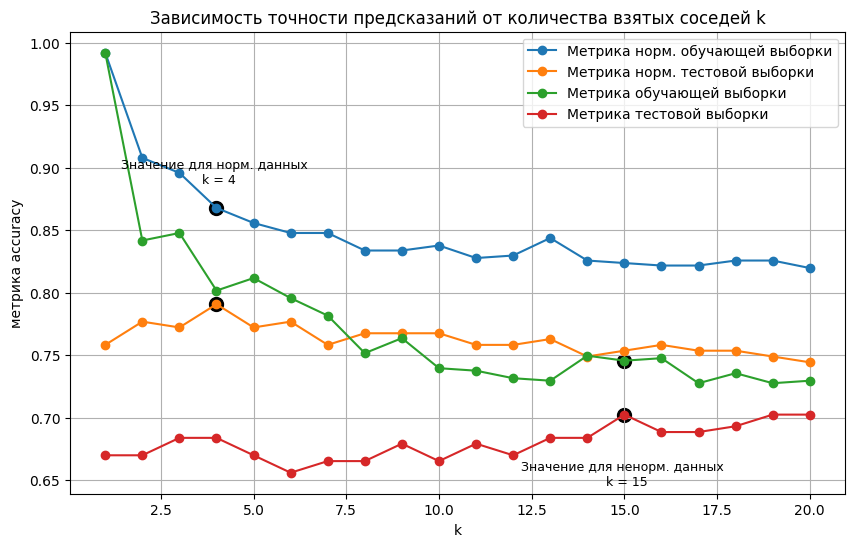

In [35]:
plt.figure(figsize=(10, 6))

plt.plot(k_arr, train_accuracy_norm, marker='o', label='Метрика норм. обучающей выборки')
plt.plot(k_arr, test_accuracy_norm, marker='o', label='Метрика норм. тестовой выборки')

plt.plot(k_arr, train_accuracy, marker='o', label='Метрика обучающей выборки')
plt.plot(k_arr, test_accuracy, marker='o', label='Метрика тестовой выборки')

plt.scatter([4, 4], [train_accuracy_norm[3], test_accuracy_norm[3]], color='black', s=100, zorder=1)
plt.text(4, train_accuracy_norm[3] + 0.02, 'Значение для норм. данных \n k = 4', fontsize=9, ha='center')

plt.scatter([15, 15], [train_accuracy[14], test_accuracy[14]], color='black', s=100, zorder=1)
plt.text(15, train_accuracy[14] - 0.1, 'Значение для ненорм. данных \n k = 15', fontsize=9, ha='center')

plt.xlabel('k')
plt.ylabel('метрика accuracy')
plt.title('Зависимость точности предсказаний от количества взятых соседей k')

plt.grid(True)
plt.legend()
plt.show()

**Вывод:** при нормировке данных точность остаётся примерно постоянной, и более высокой, чем при отсутствии нормировки, так как при её применении каждый параметр начинает вносить одинаковый вклад в итоговый результат (что важно, например, при учёте параметра пола, который почти не вносил результатов в отсутствии нормировки, но реально имел большой вес при оценке выживаемости в части исследования). Также заметна тенденция к поиску баланса между недообучением и переобучением при нормировке, поэтому выбран параметр k = 4.